# Milestone 1

#### Lorraine Steigner | Fall 2023

#### HYPERLINK HERE



Data analytics can help identify relevant trends-- especially across cultural specialites-- that 



In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("exportD8B9275C181041489764966FC897895D.csv")

/tmp/ipykernel_9269/3947412990.py:1: DtypeWarning: Columns (14,20,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("exportD8B9275C181041489764966FC897895D.csv")


In [3]:
display(df)

,URI,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Provenance,Date,Inscriptions,Attributed To,...,Technical Observations,Image Credits,Pleiades URI,Latitude,Longitude,LIMC ID,LIMC Web,British Museum Link,Ure Museum Link,Bryn Mawr College Link
0,http://www.beazley.ox.ac.uk/record/AA1CD952-92...,1.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-525 to -475,NaN,CHIUSI P by KUNZE-GOTTE | LEAGROS GROUP by KUN...,...,NaN,NaN,https://pleiades.stoa.org/places/413393,42.421429,11.702499,6368,http://ark.dasch.swiss/ark:/72163/080e-73fdcff...,NaN,NaN,NaN
1,http://www.beazley.ox.ac.uk/record/85D73CAF-DC...,2.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",-550 to -500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.beazley.ox.ac.uk/record/B7867649-B6...,3.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-550 to -500,NaN,NaN,...,NaN,NaN,https://pleiades.stoa.org/places/413393,42.421429,11.702499,1023,http://ark.dasch.swiss/ark:/72163/080e-73b1f46...,NaN,NaN,NaN
3,http://www.beazley.ox.ac.uk/record/64B75012-4B...,4.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-550 to -500,NaN,<em>Near</em> MEDEA GROUP by UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,1009,http://ark.dasch.swiss/ark:/72163/080e-73b1c12...,NaN,NaN,NaN
4,http://www.beazley.ox.ac.uk/record/ED45A6A0-5C...,5.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-525 to -475,NaN,ANTIMENEAN by KUNZE-GOTTE | DAYBREAK P by POUI...,...,NaN,NaN,NaN,NaN,NaN,10571,http://ark.dasch.swiss/ark:/72163/080e-74394cd...,https://www.britishmuseum.org/collection/objec...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131192,http://www.beazley.ox.ac.uk/record/C7AFB93A-48...,9053423.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-500 to -450,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131193,http://www.beazley.ox.ac.uk/record/49E67A19-A2...,9053424.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-500 to -450,NaN,CLINIC P by BOTHMER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131194,http://www.beazley.ox.ac.uk/record/8D202FC3-F4...,9053425.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-500 to -450,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131195,http://www.beazley.ox.ac.uk/record/E0421614-B6...,9053426.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-525 to -475,NaN,<em>School of</em> MAKRON by BOTHMER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.loc[67128]

URI                        http://www.beazley.ox.ac.uk/record/6977299F-07...
Vase Number                                                         430002.0
Fabric                                                SOUTH ITALIAN, APULIAN
Technique                                                         RED-FIGURE
Sub Technique                                                            NaN
Shape Name                                                        ALABASTRON
Provenance                                                               NaN
Date                                                                 to -300
Inscriptions                                                             NaN
 Attributed To                                                           NaN
 Decoration                Body: AMAZONS WITH AXE, SPEARS AND PELTA ON A ...
 Collection Record                         Oxford, Ashmolean Museum: 1945.55
 Publication Record        Jahrbuch des Deutschen Archäologischen Institu...

In [5]:
df.columns

Index(['URI', 'Vase Number', 'Fabric', 'Technique', 'Sub Technique',
       'Shape Name', 'Provenance', 'Date', 'Inscriptions', ' Attributed To',
       ' Decoration', ' Collection Record', ' Publication Record',
       ' Inscriptions II', 'Measurements', 'Volume', 'Weight', 'Restorations',
       'Ornament', ' Technical Observations', 'Image Credits', 'Pleiades URI',
       'Latitude', 'Longitude', 'LIMC ID', 'LIMC Web', 'British Museum Link',
       'Ure Museum Link', 'Bryn Mawr College Link'],
      dtype='object')

Since right now I'm only dealing with the single database, I remove any columns that are entirely empty.

Incidentally, those columns were:
-  Inscriptions II
- Volume
- Weight
- Restorations
- Ornament
- Technical Observations 

In [6]:
for column in df:
    tech = df[[column]].dropna()
    if tech.empty:
        #print(column)
        del df[column]

the dataset very nicely contains a lot of links to relevant records in other databases

i want to use these eventually (especially to fill in NaN data) but not in this milestone

so i make a copy of the dataframe with only the link columns

in this case the foreign key and the primary key are the same...

In [7]:
links = df[['URI',
            ' Collection Record', # what museum is the piece in now?
            ' Publication Record', # what journal/article/etc. was the piece documented in?
            'Pleiades URI',
            'LIMC ID',
            'LIMC Web',
            'British Museum Link',
            'Ure Museum Link',
            'Bryn Mawr College Link']]
links.head()

,URI,Collection Record,Publication Record,Pleiades URI,LIMC ID,LIMC Web,British Museum Link,Ure Museum Link,Bryn Mawr College Link
0,http://www.beazley.ox.ac.uk/record/AA1CD952-92...,"Munich, Antikensammlungen: J543 | Rome, Candel...","Corpus Vasorum Antiquorum: MUNICH, MUSEUM ANTI...",https://pleiades.stoa.org/places/413393,6368,http://ark.dasch.swiss/ark:/72163/080e-73fdcff...,NaN,NaN,NaN
1,http://www.beazley.ox.ac.uk/record/85D73CAF-DC...,"Athens, Agora Museum: P13332","The Athenian Agora, Results of Excavations con...",NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.beazley.ox.ac.uk/record/B7867649-B6...,"Rome, Mus. Naz. Etrusco di Villa Giulia: 63614",Jahrbuch des Deutschen Archäologischen Institu...,https://pleiades.stoa.org/places/413393,1023,http://ark.dasch.swiss/ark:/72163/080e-73b1f46...,NaN,NaN,NaN
3,http://www.beazley.ox.ac.uk/record/64B75012-4B...,"Budapest, Hungarian Museum of Fine Arts: 50.732","Bulletin du Musee Hongrois des Beaux-Arts, Bud...",NaN,1009,http://ark.dasch.swiss/ark:/72163/080e-73b1c12...,NaN,NaN,NaN
4,http://www.beazley.ox.ac.uk/record/ED45A6A0-5C...,"London, British Museum: B240 | Rome, market, B...","Barringer, J.M., Divine Escorts, Nereids in Ar...",NaN,10571,http://ark.dasch.swiss/ark:/72163/080e-74394cd...,https://www.britishmuseum.org/collection/objec...,NaN,NaN


Now since I've moved all my links into a separate dataframe i remove those columns from the original

In [8]:
df = df.drop(['URI',
            ' Collection Record', # what museum is the piece in now?
            ' Publication Record', # what journal/article/etc. was the piece documented in?
            'Pleiades URI',
            'LIMC ID',
            'LIMC Web',
            'British Museum Link',
            'Ure Museum Link',
            'Bryn Mawr College Link'],
            axis=1)
df.columns

Index(['Vase Number', 'Fabric', 'Technique', 'Sub Technique', 'Shape Name',
       'Provenance', 'Date', 'Inscriptions', ' Attributed To', ' Decoration',
       'Measurements', 'Image Credits', 'Latitude', 'Longitude'],
      dtype='object')

In [9]:
df.head()

,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Provenance,Date,Inscriptions,Attributed To,Decoration,Measurements,Image Credits,Latitude,Longitude
0,1.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-525 to -475,NaN,CHIUSI P by KUNZE-GOTTE | LEAGROS GROUP by KUN...,"A,B: TRIPTOLEMOS ON WINGED CHARIOT BETWEEN DEM...",NaN,NaN,42.421429,11.702499
1,2.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",-550 to -500,NaN,NaN,Under handle: VOLUTE KRATER,NaN,NaN,NaN,NaN
2,3.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-550 to -500,NaN,NaN,"A,B: TRIPTOLEMOS AND DEMETER",NaN,NaN,42.421429,11.702499
3,4.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-550 to -500,NaN,<em>Near</em> MEDEA GROUP by UNKNOWN,A: TRIPTOLEMOS SEATED ON CART WITH SHEAVES OF ...,NaN,NaN,NaN,NaN
4,5.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-525 to -475,NaN,ANTIMENEAN by KUNZE-GOTTE | DAYBREAK P by POUI...,A: WINGED WARRIOR RUNNING OVER SEA WITH FISH A...,NaN,NaN,NaN,NaN


I still have a few columns that aren't really relevant to what I'm looking for in this particular instance, which is *style* and *location* data.

I remove those columns

In [10]:
df = df.drop([' Attributed To',
            ' Decoration',
            'Inscriptions',
            'Measurements',
            'Image Credits'],
            axis=1)
df.columns

Index(['Vase Number', 'Fabric', 'Technique', 'Sub Technique', 'Shape Name',
       'Provenance', 'Date', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
display(df)

,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Provenance,Date,Latitude,Longitude
0,1.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-525 to -475,42.421429,11.702499
1,2.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",-550 to -500,NaN,NaN
2,3.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-550 to -500,42.421429,11.702499
3,4.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-550 to -500,NaN,NaN
4,5.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-525 to -475,NaN,NaN
...,...,...,...,...,...,...,...,...,...
131192,9053423.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-500 to -450,NaN,NaN
131193,9053424.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-500 to -450,NaN,NaN
131194,9053425.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-500 to -450,NaN,NaN
131195,9053426.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-525 to -475,NaN,NaN


### Reformatting Existing Data

I've done the easy part of just filtering out the data I want to look at. Now I want to reformat the 

In particular, I want to:
- split Date into two columns-- the early estimate and the late estimate. 
- split provenance into three columns -- country, region, and site. 

**DATES**

In [12]:
df.insert(7, 'Earliest Date', np.nan)
df.insert(8, 'Latest Date', np.nan)

In [13]:
for i, date in df["Date"].items():
    if not pd.isnull(date): # two anomalies: either date == "0" or date == " to -300" 
        if ( "to" not in str(date) ) or ( len(date.split(" to ")) ) == 1:
            date = re.sub('[a-zA-Z]', '', str(date)).strip()
            df.at[i,"Date"] = f"{date} to {date}" 
        dates = df.at[i,"Date"].split(" to ")
        df.at[i,'Earliest Date'] = dates[0]
        df.at[i,'Latest Date'] = dates[1]

In [14]:
del df['Date']

In [15]:
display(df)

,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Provenance,Earliest Date,Latest Date,Latitude,Longitude
0,1.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-525,-475,42.421429,11.702499
1,2.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",-550,-500,NaN,NaN
2,3.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-550,-500,42.421429,11.702499
3,4.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-550,-500,NaN,NaN
4,5.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-525,-475,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
131192,9053423.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-500,-450,NaN,NaN
131193,9053424.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-500,-450,NaN,NaN
131194,9053425.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-500,-450,NaN,NaN
131195,9053426.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,-525,-475,NaN,NaN


**LOCATION**

In [16]:
# for i in (df["Provenance"].dropna().unique()):
#     print(i)

In [17]:
df.insert(6, 'Country', np.nan)
df.insert(7, 'Region', np.nan)
df.insert(8, 'Site', np.nan)
df.insert(9, 'Site, specific', np.nan)

df.head()

,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Provenance,Country,Region,Site,"Site, specific",Earliest Date,Latest Date,Latitude,Longitude
0,1.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",NaN,NaN,NaN,NaN,-525,-475,42.421429,11.702499
1,2.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",NaN,NaN,NaN,NaN,-550,-500,NaN,NaN
2,3.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",NaN,NaN,NaN,NaN,-550,-500,42.421429,11.702499
3,4.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,NaN,NaN,NaN,NaN,-550,-500,NaN,NaN
4,5.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,NaN,NaN,NaN,NaN,-525,-475,NaN,NaN


In [18]:
columns = ["Country", "Region", "Site", "Site, specific"]
    
for i, location in df["Provenance"].items():

    if not pd.isnull(location):
        location = re.sub('[^a-zA-Z\d\s,]', '', location).strip()
        location = location.split(",")
        
        for j, column in enumerate(columns):
            if j + 1 > len(location): # only runs while index availble in both columns and location
                break
            elif j <= 3:
                df.at[i, column] = location[j].strip()
            else:
                df.at[i, column] = location[j:]

In [19]:
del df['Provenance']

In [20]:
display(df)

,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Country,Region,Site,"Site, specific",Earliest Date,Latest Date,Latitude,Longitude
0,1.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",ITALY,ETRURIA,VULCI,NaN,-525,-475,42.421429,11.702499
1,2.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT",GREECE,ATHENS,AGORA,NaN,-550,-500,NaN,NaN
2,3.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",ITALY,ETRURIA,VULCI,NaN,-550,-500,42.421429,11.702499
3,4.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,NaN,NaN,NaN,-550,-500,NaN,NaN
4,5.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,NaN,NaN,NaN,-525,-475,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131192,9053423.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,NaN,NaN,NaN,-500,-450,NaN,NaN
131193,9053424.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,NaN,NaN,NaN,-500,-450,NaN,NaN
131194,9053425.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,NaN,NaN,NaN,-500,-450,NaN,NaN
131195,9053426.0,ATHENIAN,RED-FIGURE,NaN,CUP FRAGMENT,NaN,NaN,NaN,NaN,-525,-475,NaN,NaN


### Type Cleanup

In [21]:
# for i in (df["Shape Name"].dropna().unique()):
#     print(i)

In [22]:
df.dtypes

Vase Number       float64
Fabric             object
Technique          object
Sub Technique      object
Shape Name         object
Country            object
Region             object
Site               object
Site, specific     object
Earliest Date      object
Latest Date        object
Latitude          float64
Longitude         float64
dtype: object

In [23]:
df['Fabric'] = df['Fabric'].astype('category')
df['Technique'] = df['Technique'].astype('category')
df['Sub Technique'] = df['Sub Technique'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Site'] = df['Site'].astype('category')
df['Site, specific'] = df['Site, specific'].astype('category')
df["Earliest Date"] = pd.to_numeric(df["Earliest Date"])
df["Latest Date"] = pd.to_numeric(df["Latest Date"])

In [24]:
df.dtypes

Vase Number        float64
Fabric            category
Technique         category
Sub Technique     category
Shape Name          object
Country           category
Region            category
Site              category
Site, specific    category
Earliest Date      float64
Latest Date        float64
Latitude           float64
Longitude          float64
dtype: object

At this point I'm most concerned with the most broad location marker, country, so I'm going to review the categories for duplicates and eliminate them. 

In [25]:
print(df["Country"].cat.categories)

Index(['ALBANIA', 'ALGERIA', 'BOSNIA', 'BULGARIA', 'CROATIA', 'CYPRUS',
       'CZECH REPUBLIC', 'EGYPT', 'ENGLAND', 'FRANCE', 'GEORGIA', 'GERMANY',
       'GREECE', 'GREECE ARGOLIS', 'IRAN', 'IRAQ', 'ISRAEL', 'ITALY',
       'JORDANIA', 'LEBANON', 'LIBYA', 'MAGNA GRAECIA', 'MALTA',
       'NORTH MACEDONIA', 'PALESTINE', 'POLAND', 'PORTUGAL', 'ROMANIA',
       'RUSSIA', 'SERBIA', 'SPAIN', 'SUDAN', 'SWITZERLAND', 'SYRIA',
       'TESTING2', 'TUNESIA', 'TURKEY', 'UKRAINE', 'iTALY'],
      dtype='object')


In [26]:
df.replace({'Country': {"GREECE ARGOLIS": "GREECE", # greece argolis is a region in the peloponessian peninsula
                        "MAGNA GRAECIA": "ITALY", # roman term for the greek-speaking regions of italy
                        "iTALY": "ITALY"}}); # just a misspelling

In [27]:
# checked that these are empty now -- they are
#df.loc[df['Country'] == "GREECE ARGOLIS"]
#df.loc[df['Country'] == "MAGNA GRAECIA"]
#df.loc[df['Country'] == "iTALY"]

# can't access this vase in the database and it has no data anyway, so I'll delete it in the next block
df.loc[df['Country'] == "TESTING2"]

,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Country,Region,Site,"Site, specific",Earliest Date,Latest Date,Latitude,Longitude
99140,9020826.0,NaN,NaN,NaN,NaN,TESTING2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.drop(99140)
df["Country"] = df["Country"].cat.remove_unused_categories()

In [29]:
print(df["Country"].cat.categories)

Index(['ALBANIA', 'ALGERIA', 'BOSNIA', 'BULGARIA', 'CROATIA', 'CYPRUS',
       'CZECH REPUBLIC', 'EGYPT', 'ENGLAND', 'FRANCE', 'GEORGIA', 'GERMANY',
       'GREECE', 'GREECE ARGOLIS', 'IRAN', 'IRAQ', 'ISRAEL', 'ITALY',
       'JORDANIA', 'LEBANON', 'LIBYA', 'MAGNA GRAECIA', 'MALTA',
       'NORTH MACEDONIA', 'PALESTINE', 'POLAND', 'PORTUGAL', 'ROMANIA',
       'RUSSIA', 'SERBIA', 'SPAIN', 'SUDAN', 'SWITZERLAND', 'SYRIA',
       'TESTING2', 'TUNESIA', 'TURKEY', 'UKRAINE', 'iTALY'],
      dtype='object')


In [30]:
df.dtypes

Vase Number        float64
Fabric            category
Technique         category
Sub Technique     category
Shape Name          object
Country           category
Region            category
Site              category
Site, specific    category
Earliest Date      float64
Latest Date        float64
Latitude           float64
Longitude          float64
dtype: object

### Remove NA location and date values

In [31]:
len(df.index)

131197

In [32]:
df = df.dropna(subset=['Country'])
len(df.index)

54770

In [33]:
df = df.dropna(subset=['Earliest Date'])
df = df.dropna(subset=['Latest Date'])
len(df.index)

49688

In [34]:
display(df)

,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Country,Region,Site,"Site, specific",Earliest Date,Latest Date,Latitude,Longitude
0,1.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",ITALY,ETRURIA,VULCI,NaN,-525.0,-475.0,42.421429,11.702499
1,2.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT",GREECE,ATHENS,AGORA,NaN,-550.0,-500.0,NaN,NaN
2,3.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",ITALY,ETRURIA,VULCI,NaN,-550.0,-500.0,42.421429,11.702499
10,12.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, PANATHENAIC PRIZE FRAGMENT",GREECE,ATHENS,AGORA,NaN,-300.0,-200.0,NaN,NaN
19,22.0,ATHENIAN,RED-FIGURE,NaN,CHOUS FRAGMENT,GREECE,AEGINA,NaN,NaN,-450.0,-400.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131169,9053400.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT",UKRAINE,BEREZAN,NaN,NaN,-575.0,-525.0,46.629636,31.484070
131170,9053401.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT",UKRAINE,BEREZAN,NaN,NaN,-575.0,-525.0,46.629636,31.484070
131171,9053402.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT",UKRAINE,BEREZAN,NaN,NaN,-575.0,-525.0,46.629636,31.484070
131172,9053403.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT",UKRAINE,BEREZAN,NaN,NaN,-575.0,-525.0,46.629636,31.484070


### Analysis

#### Pottery Dates & Production

In [35]:
italy = df.loc[df['Country'] == 'ITALY']
italy_black = italy.loc[italy['Technique'] == 'BLACK-FIGURE']
italy_red = italy.loc[italy['Technique'] == 'RED-FIGURE']
#display(italy)

In [36]:
greece = df.loc[df['Country'] == 'GREECE']
greece_black = greece.loc[greece['Technique'] == 'BLACK-FIGURE']
greece_red = greece.loc[greece['Technique'] == 'RED-FIGURE']
#display(greece)

In [37]:
print(f"Black figures show up in Italian pottery in {italy_black['Earliest Date'].min()} BCE at the earliest and disappear by {italy_black['Latest Date'].max()}. ", end='') 
print(f"They were being either imported or produced in ancient Italy for {abs(italy_black['Earliest Date'].min() - italy_black['Latest Date'].max())} years. ")
print(f"Red figures show up in Italian pottery in {italy_red['Earliest Date'].min()} BCE at the earliest and disappear by {italy_red['Latest Date'].max()}. ", end='') 
print(f"They were being either imported or produced in ancient Italy for {abs(italy_red['Earliest Date'].min() - italy_red['Latest Date'].max())} years. \n ")


print(f"Black figures show up in Grecian pottery in {greece_black['Earliest Date'].min()} BCE at the earliest and disappear by {greece_black['Latest Date'].max()}. ", end='') 
print(f"They were being either imported or produced in ancient Greece for {abs(greece_black['Earliest Date'].min() - greece_black['Latest Date'].max())} years.")
print(f"Red figures show up in Grecian pottery in {greece_red['Earliest Date'].min()} BCE at the earliest and disappear by {greece_red['Latest Date'].max()}. ", end='') 
print(f"They were being either imported or produced in ancient Greece for {abs(greece_red['Earliest Date'].min() - greece_red['Latest Date'].max())} years.")

Black figures show up in Italian pottery in -675.0 BCE at the earliest and disappear by -100.0. They were being either imported or produced in ancient Italy for 575.0 years. 
Red figures show up in Italian pottery in -575.0 BCE at the earliest and disappear by -300.0. They were being either imported or produced in ancient Italy for 275.0 years. 
 
Black figures show up in Grecian pottery in -675.0 BCE at the earliest and disappear by -100.0. They were being either imported or produced in ancient Greece for 575.0 years.
Red figures show up in Grecian pottery in -575.0 BCE at the earliest and disappear by -300.0. They were being either imported or produced in ancient Greece for 275.0 years.


This quick analysis reflects that Black-figure pottery had a longer presence in the mediterranean than red-figure pottery, and that their rise and fall in popularity happened concurrently in both Italy and Greece, which is a reflection of a robust trading system between the two neighboring countries, even before the Roman Empire gained a strong presence on the Italian peninsula. 

This makes sense-- Greece pionneered both the black-figure and red-figure styles of pottery, so it is likely that the Italian potteries are a reflection on what was being produced in the Greek world. Native Italian potteries, like Etruscan bucchero, would follow different trends. But this dataset as is right now is still only rudimentarily processed, and there's actually no record of any pottery with bucchero technique in the italian dataset I'm using right now-- and all bucchero pottery is italian by definiton.

In [38]:
bucchero = italy.loc[italy['Technique'] == 'BUCCHERO'] # or italy.loc[italy['Technique'] == 'BUCCHERO AND IMPASTO NERO' ]
display(bucchero)

,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Country,Region,Site,"Site, specific",Earliest Date,Latest Date,Latitude,Longitude


A quick look at the original BEAZLEY ARCHIVE POTTERY DATABASE reveals that they don't record any direct location data for their bucchero pots. Going forward it would be prudent to figure out a way to fill in this missing data, hopefully by cross referencing with another dataset. 

In [39]:
italian_techniques = italy.dropna(subset=["Technique"]) 
italian_techniques["Technique"].unique()

['BLACK-FIGURE', 'RED-FIGURE', 'BLACK GLAZE', 'PATTERN']
Categories (53, object): ['ADDED COLOUR', 'BICHROME', 'BLACK GLAZE', 'BLACK PATTERN', ..., 'TERRA SIGILLATA', 'WHITE ON RED PAINTED WARE', 'WHITE PAINTED', 'WHITE SLIP WARE']

In [40]:
#italian_techniques.loc[italian_techniques['Technique'] == "PATTERN"]

<Axes: xlabel='Earliest Date'>

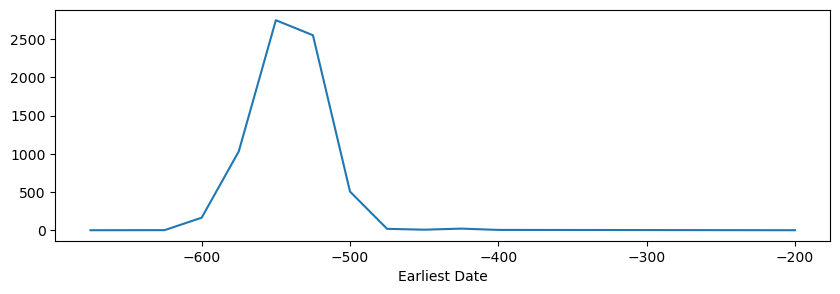

In [41]:
black_figures = italian_techniques[italian_techniques.Technique == "BLACK-FIGURE"]
black_figures.groupby(['Earliest Date']).size().plot(x="Earliest Date", figsize=(10,3))

<Axes: xlabel='Earliest Date'>

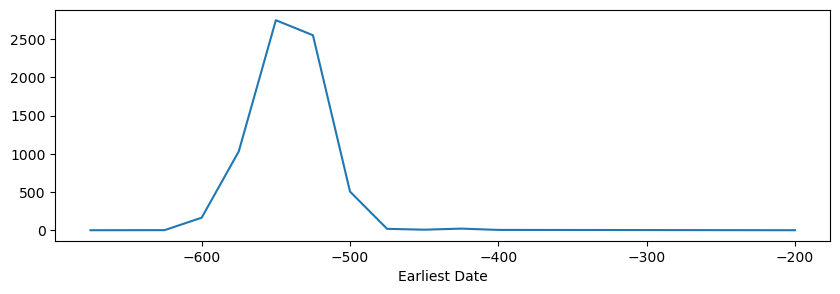

In [42]:
black_figures = italian_techniques[italian_techniques.Technique == "BLACK-FIGURE"]
black_figures.groupby(['Earliest Date']).size().plot(x="Earliest Date", figsize=(10,3))

<Axes: xlabel='Earliest Date'>

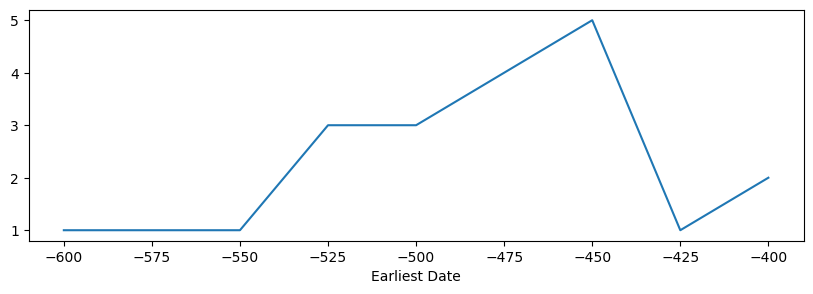

In [43]:
black_glaze = italian_techniques[italian_techniques.Technique == "BLACK GLAZE"]
black_glaze.groupby(['Earliest Date']).size().plot(x="Earliest Date", figsize=(10,3))

<Axes: xlabel='Earliest Date'>

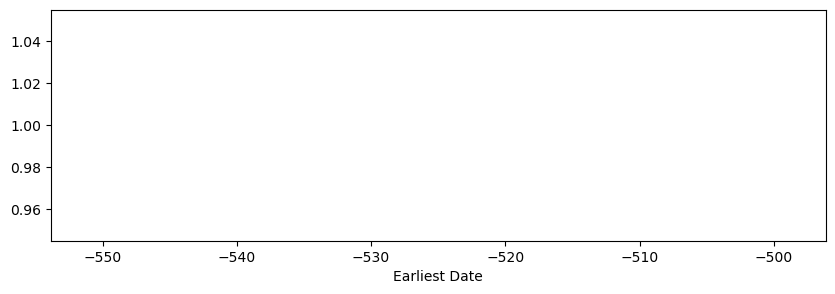

In [44]:
# There's only one record of pattern in this dataset, so it doesn't have a visible graph

pattern = italian_techniques[italian_techniques.Technique == "PATTERN"]
pattern.groupby(['Earliest Date']).size().plot(x="Earliest Date", figsize=(10,3))